In [1]:
import math
math.sqrt(0.81)

0.9

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
df_spot = pd.read_csv('assignment-analyst-1-spot-data.csv', parse_dates=['time'], index_col='time')

In [4]:
df_web = pd.read_csv('assignment-analyst-1-web-traffic-data.csv', parse_dates=['time'], index_col='time')

### Spot Data

In [5]:
df_spot.head()

,id,creative_id,spend,program,duration,network_code,is_dual_feed,rotation,rotation_days,rotation_start,rotation_end,feed
time,,,,,,,,,,,,
2017-10-16 12:25:32,411630,f3483f810d44cef79d90a66ab2da1bf0,69.7,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,1.0
2017-10-16 15:25:32,411630,f3483f810d44cef79d90a66ab2da1bf0,15.3,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,2.0
2017-10-16 12:56:36,411631,eff6a8d032a8ca3ae098381569a9c15f,69.7,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,1.0
2017-10-16 15:56:36,411631,eff6a8d032a8ca3ae098381569a9c15f,15.3,RAISING HOPE,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,2.0
2017-10-16 14:38:41,411651,5992d996de2f11faa3492960a58de350,69.7,PARKS AND RECREATION,14.0,FXX,True,Weekday Day,"{1,2,3,4,5}",07:00:00,15:00:00,1.0


In [6]:
df_spot.count()

id                1456
creative_id       1456
spend             1456
program           1296
duration          1172
network_code      1456
is_dual_feed      1456
rotation          1456
rotation_days     1456
rotation_start    1456
rotation_end      1456
feed              1456
dtype: int64

In [7]:
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456 entries, 2017-10-16 12:25:32 to 2017-11-13 06:17:12
Data columns (total 12 columns):
id                1456 non-null int64
creative_id       1456 non-null object
spend             1456 non-null float64
program           1296 non-null object
duration          1172 non-null float64
network_code      1456 non-null object
is_dual_feed      1456 non-null bool
rotation          1456 non-null object
rotation_days     1456 non-null object
rotation_start    1456 non-null object
rotation_end      1456 non-null object
feed              1456 non-null float64
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 137.9+ KB


In [8]:
df_spot.describe()

,id,spend,duration,feed
count,1456.000000,1456.000000,1172.000000,1456.000000
mean,430257.093407,113.702679,15.068259,1.500000
std,13448.714565,237.966319,4.115180,0.500172
min,411630.000000,3.060000,12.000000,1.000000
25%,421971.750000,22.950000,14.000000,1.000000
50%,424542.500000,48.790000,14.000000,1.500000
75%,439524.250000,111.520000,14.000000,2.000000
max,461221.000000,3485.000000,29.000000,2.000000


### Time

In [9]:
df_spot.index

DatetimeIndex(['2017-10-16 12:25:32', '2017-10-16 15:25:32',
               '2017-10-16 12:56:36', '2017-10-16 15:56:36',
               '2017-10-16 14:38:41', '2017-10-16 17:38:41',
               '2017-10-16 14:38:57', '2017-10-16 17:38:57',
               '2017-10-16 16:49:41', '2017-10-16 19:49:41',
               ...
               '2017-11-12 22:00:24', '2017-11-13 01:00:24',
               '2017-11-12 18:39:17', '2017-11-12 21:39:17',
               '2017-11-13 00:42:17', '2017-11-12 21:42:17',
               '2017-11-13 04:23:42', '2017-11-13 07:23:42',
               '2017-11-13 09:17:12', '2017-11-13 06:17:12'],
              dtype='datetime64[ns]', name='time', length=1456, freq=None)

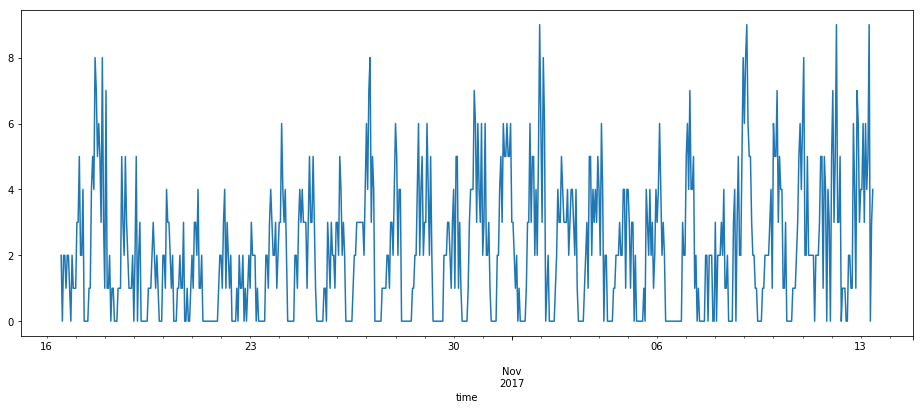

In [10]:
df_spot['spend'].resample('1H').count().plot(figsize=(16,6))

### Direct Traffic

Text(0.5,1,'Direct Traffic')

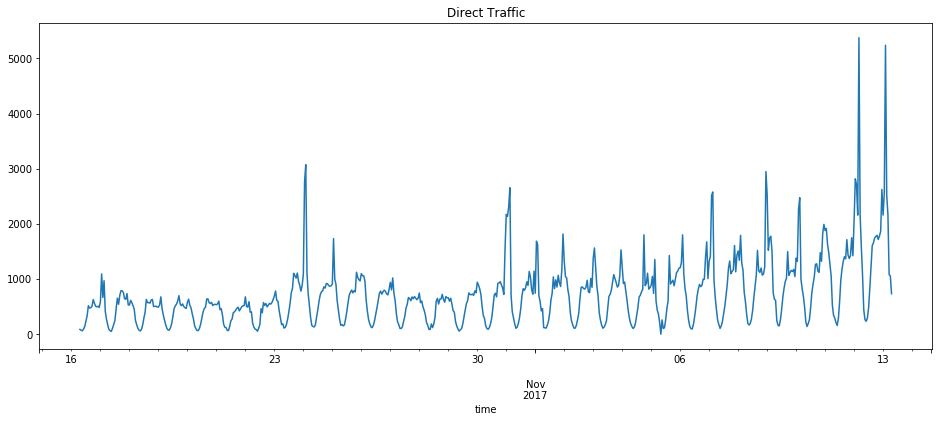

In [11]:
df_web[df_web['traffic_source'] == 'direct'].resample("1H")['value'].sum().plot(figsize=(16,6))
plt.title('Direct Traffic')

### Email Traffic

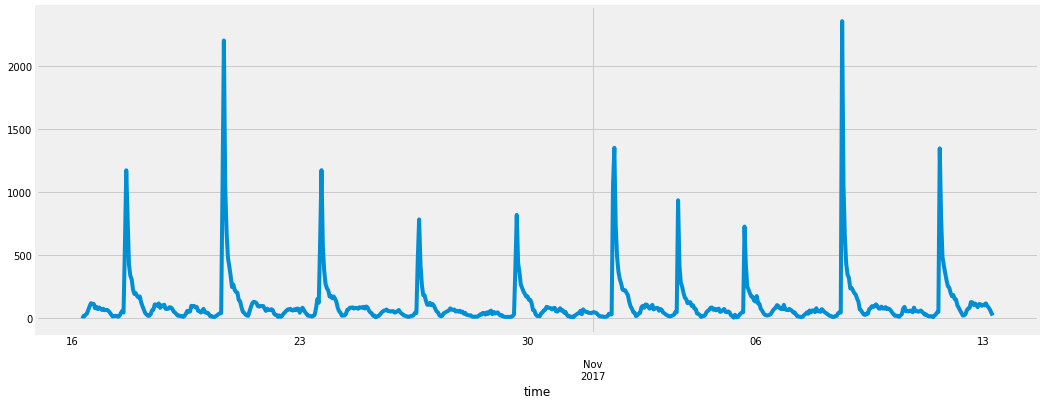

In [297]:
df_web[df_web['traffic_source'] == 'email'].resample("1H")['value'].sum().plot(figsize=(16,6))

In [13]:
df_web['traffic_source'].value_counts()

direct    40380
email     23571
Name: traffic_source, dtype: int64

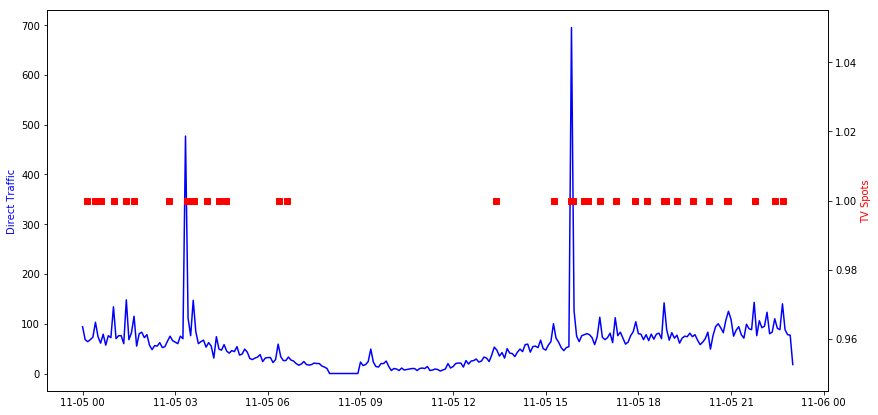

In [14]:
from_time = '2017-11-05'
to_time = '2017-11-05 23:00'

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df_web[df_web['traffic_source'] == 'direct'][from_time:to_time].resample("5T")['value'].sum(), color='blue')
ax1.set_ylabel('Direct Traffic', color='blue')

ax2 = ax1.twinx()
spots_by_min = df_spot[from_time:to_time].resample('1min')['id'].count()
spots_by_min = spots_by_min[spots_by_min > 0]
ax2.plot(spots_by_min, color='red', marker='s', linestyle='none')
ax2.set_ylabel('TV Spots', color='red')

plt.show()

### Duration

In [15]:
df_spot['duration'].value_counts()

14.0    862
13.0    178
29.0     86
15.0     22
12.0      8
17.0      8
28.0      6
27.0      2
Name: duration, dtype: int64

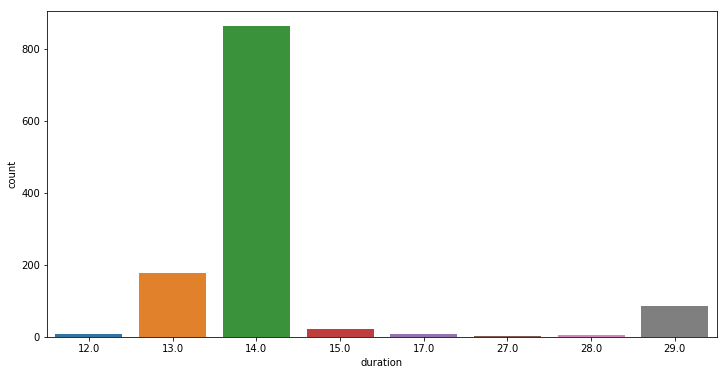

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='duration', data=df_spot)

### Spend

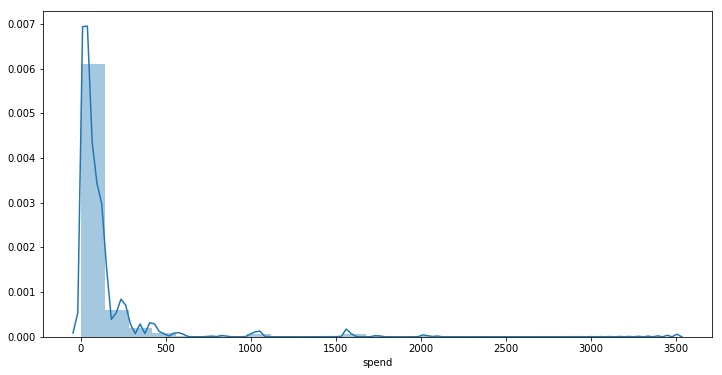

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df_spot['spend'], bins=25)

## Web Baseline

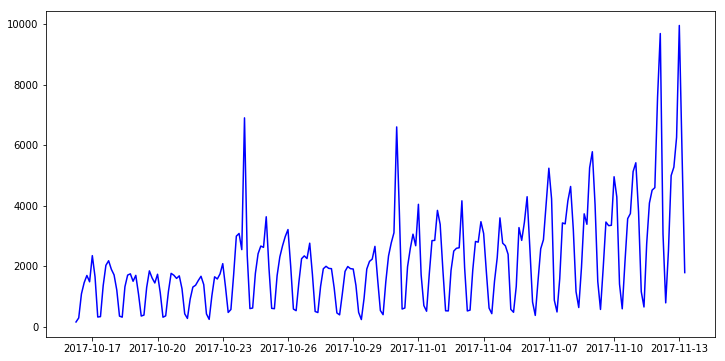

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df_web[df_web['traffic_source'] == 'direct'].resample("3H")['value'].sum(), color='blue')

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

/Users/rgabillet/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


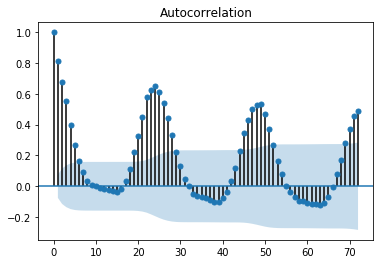

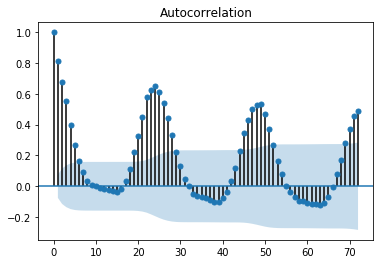

In [20]:
plot_acf(df_web[df_web['traffic_source'] == 'direct'].resample("1H")['value'].sum(), lags=3*24)

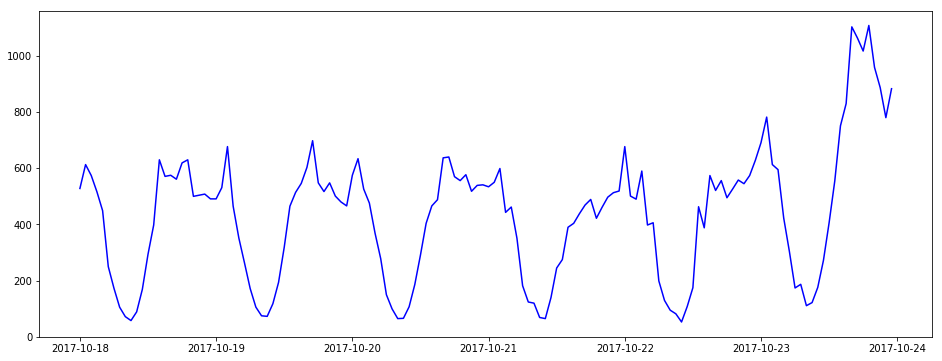

In [21]:
plt.figure(figsize=(16,6))
web_direct = df_web[df_web['traffic_source'] == 'direct']['2017-10-18':'2017-10-23'][['value']].resample('1H').sum()
plt.plot(web_direct, color='blue')


In [22]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [23]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(17,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

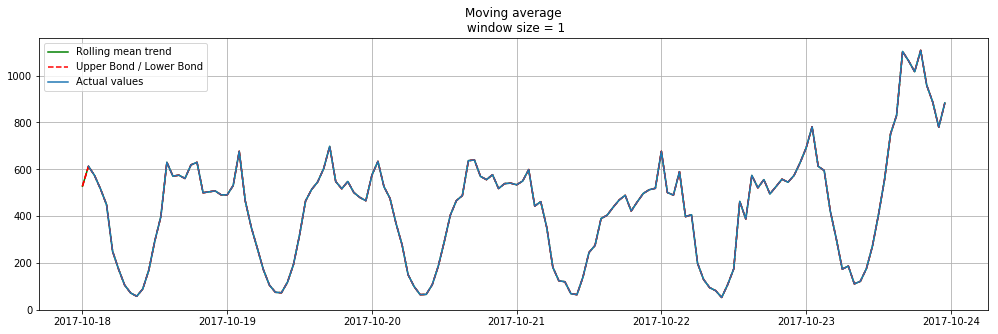

In [24]:
# Rolling last hour
plotMovingAverage(web_direct, 1, plot_intervals=True)

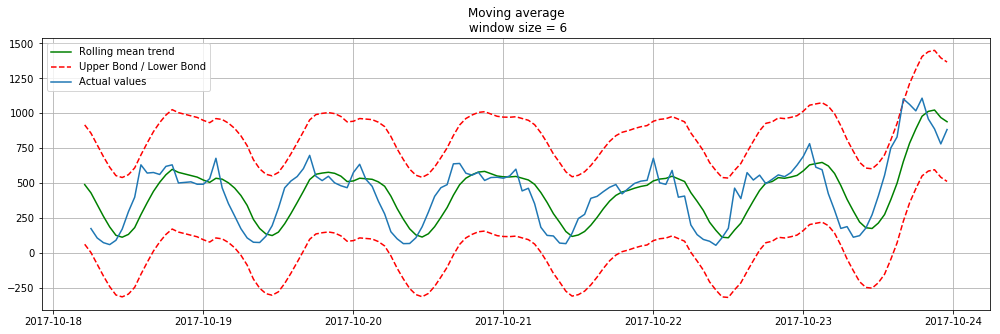

In [25]:
# rolling last 6 hours
plotMovingAverage(web_direct, 6, plot_intervals=True)

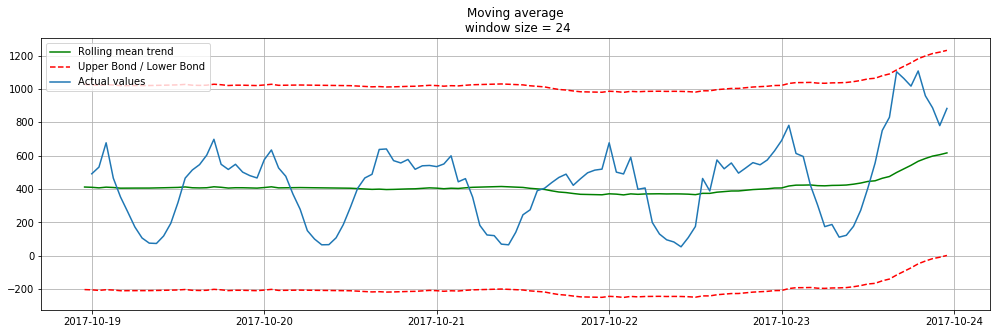

In [26]:
# rolling 24 hours
plotMovingAverage(web_direct, 24, plot_intervals=True)

In [27]:
web_direct_anomalies = web_direct.copy()
web_direct_anomalies.iloc[-20] = web_direct_anomalies.iloc[-20] * 0.2

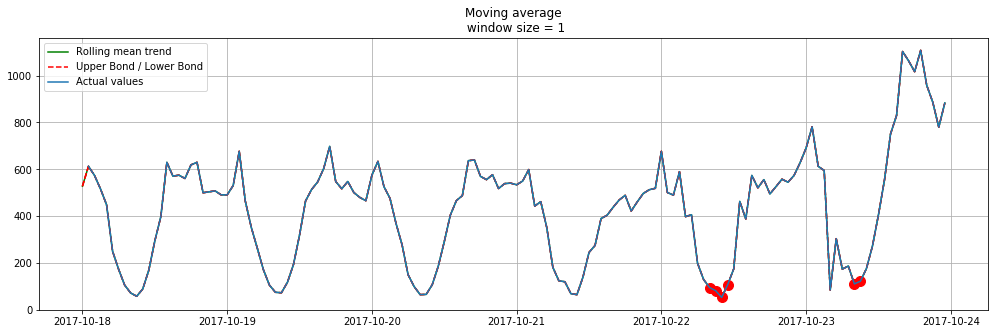

In [28]:
plotMovingAverage(web_direct_anomalies, 1, plot_intervals=True, plot_anomalies=True)

In [29]:
def weighted_average(series, weights):
    """
        Calculate weighter average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [30]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [31]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

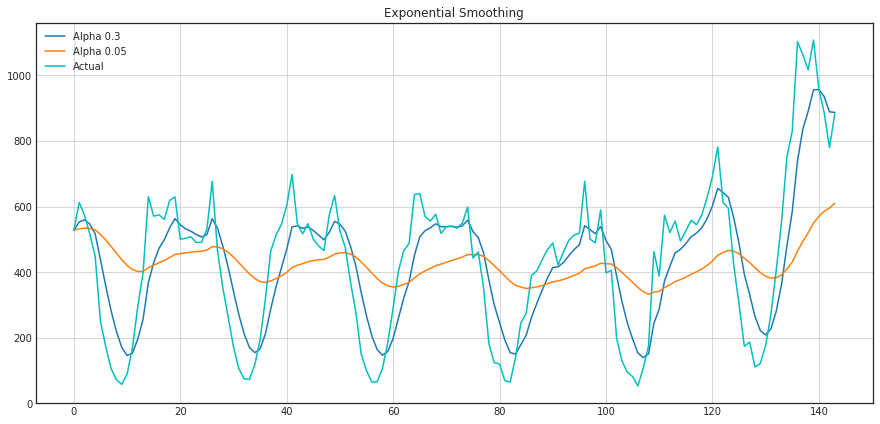

In [32]:
plotExponentialSmoothing(web_direct['value'], [0.3, 0.05])

In [33]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

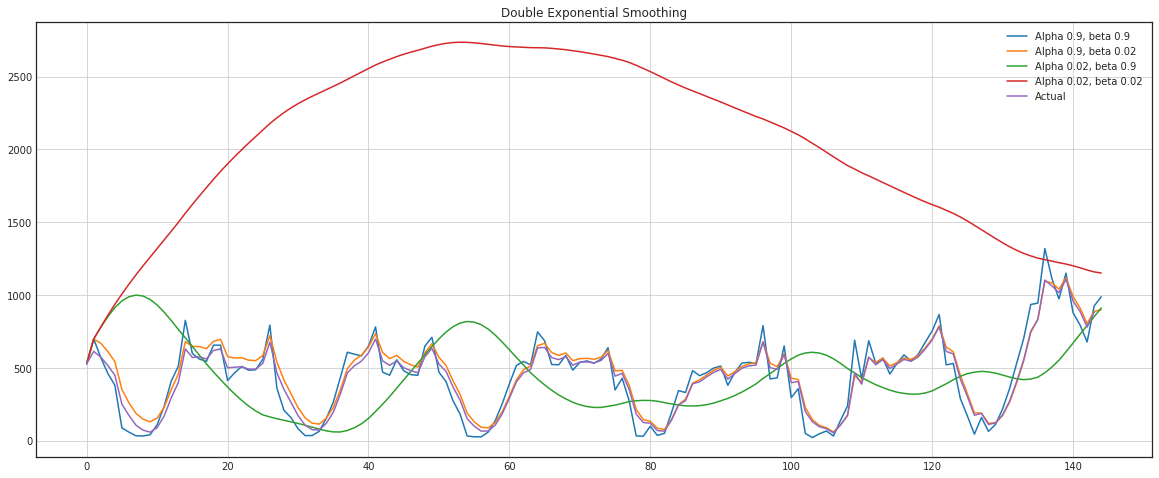

In [34]:
plotDoubleExponentialSmoothing(web_direct['value'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [35]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [36]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=4*24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [37]:
%%time

from scipy.optimize import minimize  

data = web_direct['value'][:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

ZeroDivisionError: float division by zero

## Econometric approach

In [38]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [39]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

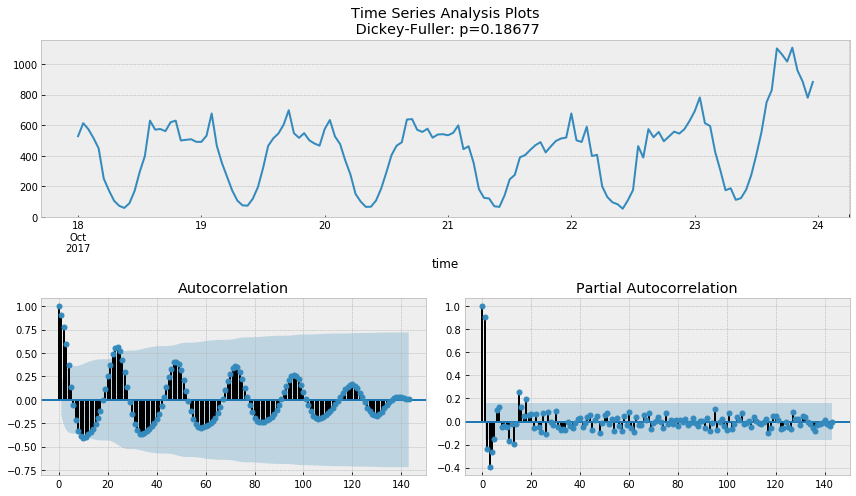

In [40]:
tsplot(web_direct['value'])

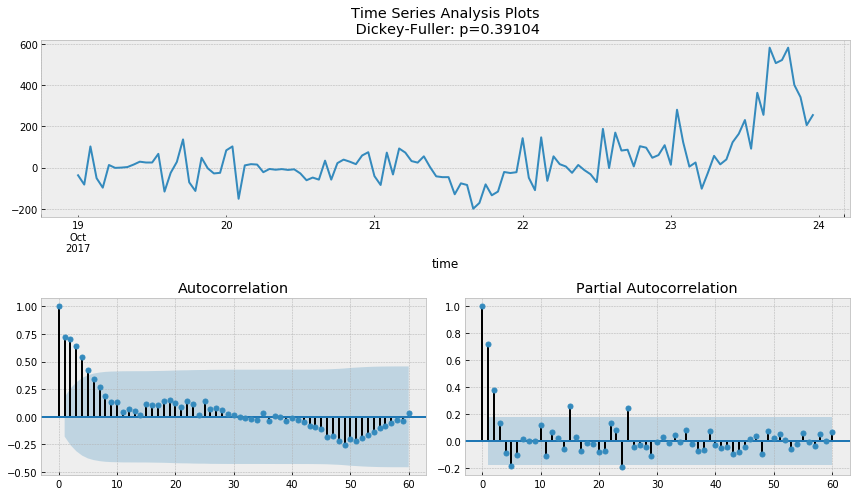

In [41]:
web_diff = web_direct['value'] - web_direct['value'].shift(24)
tsplot(web_diff[24:], lags=60)

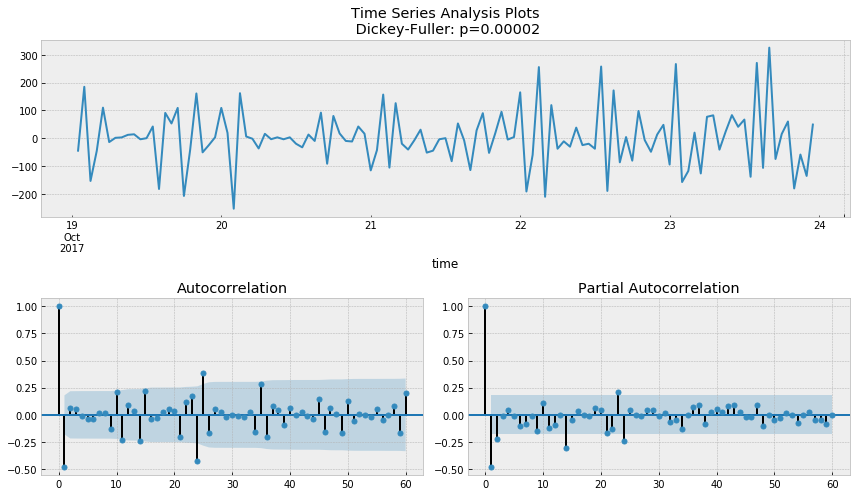

In [42]:
web_diff = web_diff - web_diff.shift(1)
tsplot(web_diff[24+1:], lags=60)

In [62]:
from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [68]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(1, 4)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [69]:
def optimizeSARIMA(data, parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(data, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[3], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [70]:
%%time
result_table = optimizeSARIMA(web_direct['value'], parameters_list, d, D, s)

HBox(children=(IntProgress(value=0, max=36), HTML(value='')))


CPU times: user 1min 1s, sys: 381 ms, total: 1min 2s
Wall time: 31.4 s


In [71]:
result_table.head()

,parameters,aic
0,"(3, 2, 1, 1)",1382.147829
1,"(3, 2, 0, 1)",1382.147829
2,"(2, 1, 0, 1)",1383.865536
3,"(2, 1, 1, 1)",1383.865536
4,"(3, 1, 0, 1)",1385.281208


In [72]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(web_direct['value'],
                                     order=(p, d, q), 
                                     seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, 1, 24)   Log Likelihood                -683.074
Date:                            Sat, 19 May 2018   AIC                           1382.148
Time:                                    11:17:12   BIC                           1405.906
Sample:                                10-18-2017   HQIC                          1391.802
                                     - 10-23-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4145      0.127     -3.262      0.001      -0.663      -0.165
ar.L2         -1.0090      0.032   

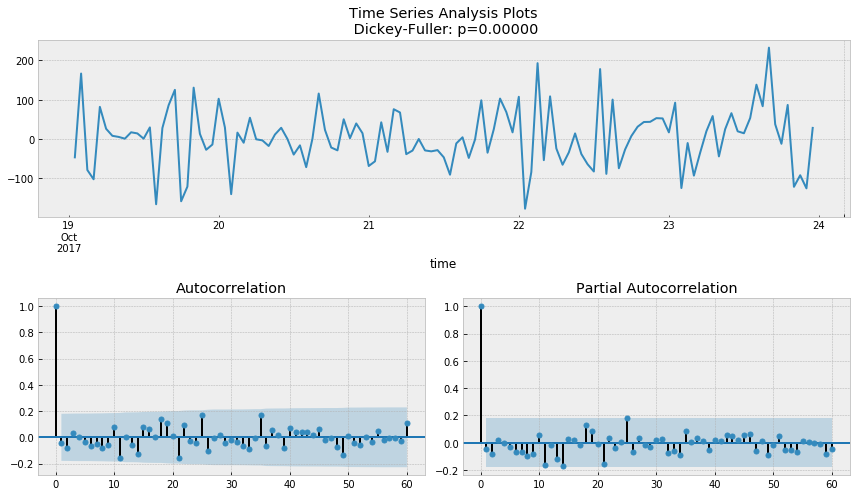

In [73]:
tsplot(best_model.resid[24+1:], lags=60)

In [81]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

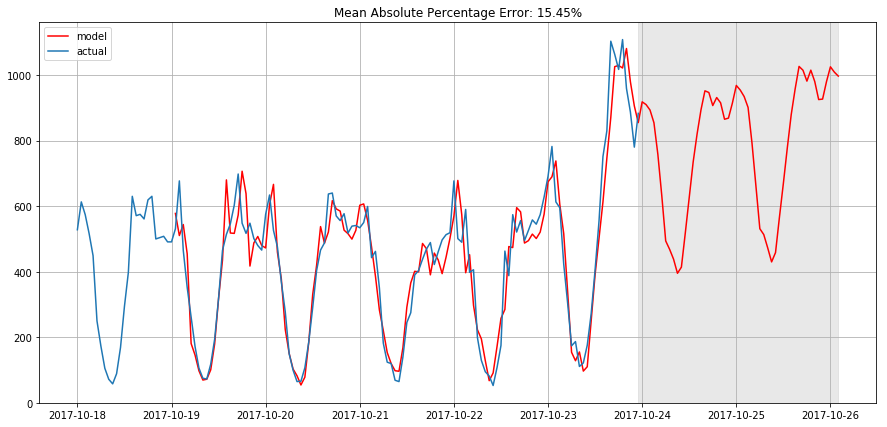

In [82]:
plotSARIMA(web_direct, best_model, 50)


## Linear Models

In [136]:
web_direct = df_web[df_web['traffic_source'] == 'direct']['2017-10-01':'2017-12-01'][['value']].resample('1H').sum()

data = pd.DataFrame(web_direct['value'].copy())
data.columns = ["y"]

In [137]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

In [138]:
# take a look at the new dataframe 
data.tail(7)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
time,,,,,,,,,,,,,,,,,,,,
2017-11-13 01:00:00,2569.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,825.0,478.0,293.0,233.0,263.0,439.112944,1062.000000,1572.000000,2165.000000,5375.000000,2158.000000,2710.000000,2816.0
2017-11-13 02:00:00,5237.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,825.0,478.0,293.0,233.0,263.000000,439.112944,1062.000000,1572.000000,2165.000000,5375.000000,2158.000000,2710.0
2017-11-13 03:00:00,2524.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,825.0,478.0,293.0,233.000000,263.000000,439.112944,1062.000000,1572.000000,2165.000000,5375.000000,2158.0
2017-11-13 04:00:00,2167.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,825.0,478.0,293.000000,233.000000,263.000000,439.112944,1062.000000,1572.000000,2165.000000,5375.0
2017-11-13 05:00:00,1080.0,2623.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,825.0,478.000000,293.000000,233.000000,263.000000,439.112944,1062.000000,1572.000000,2165.0
2017-11-13 06:00:00,1057.0,2159.0,2623.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,825.000000,478.000000,293.000000,233.000000,263.000000,439.112944,1062.000000,1572.0
2017-11-13 07:00:00,733.0,2569.0,2159.0,2623.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.000000,825.000000,478.000000,293.000000,233.000000,263.000000,439.112944,1062.0


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [140]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test


In [141]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [142]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

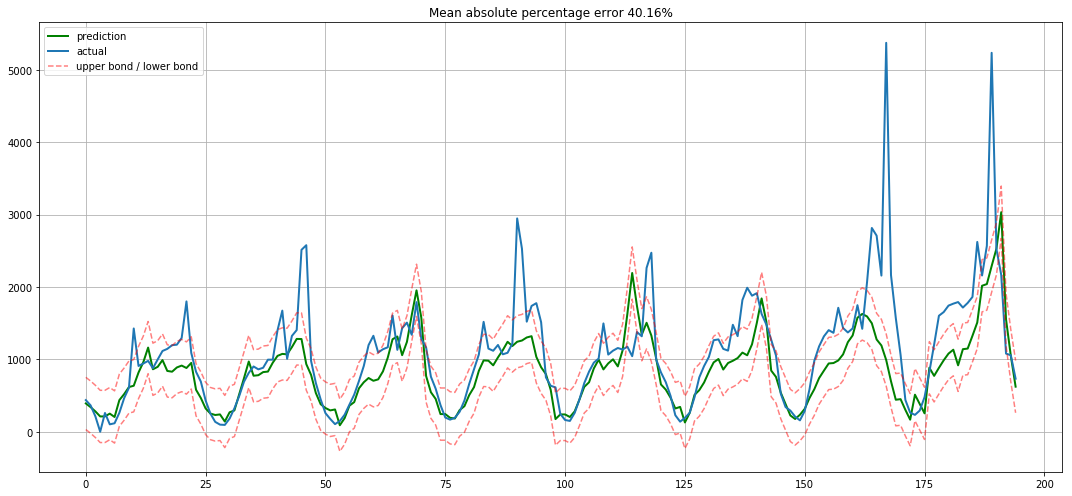

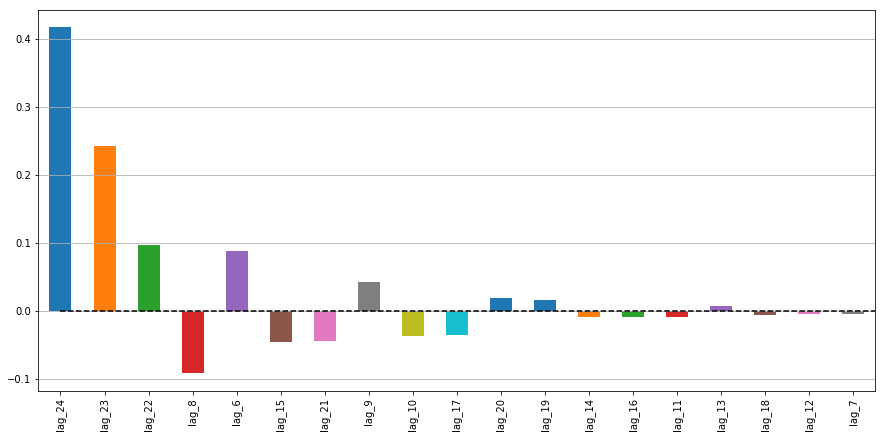

In [144]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [145]:
data.index = data.index.to_datetime()
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.tail()

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,...,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,hour,weekday,is_weekend
time,,,,,,,,,,,,,,,,,,,,,
2017-11-13 03:00:00,2524.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,825.0,...,263.0,439.112944,1062.000000,1572.000000,2165.000000,5375.000000,2158.0,3,0,0
2017-11-13 04:00:00,2167.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,1205.0,...,233.0,263.000000,439.112944,1062.000000,1572.000000,2165.000000,5375.0,4,0,0
2017-11-13 05:00:00,1080.0,2623.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,1603.0,...,293.0,233.000000,263.000000,439.112944,1062.000000,1572.000000,2165.0,5,0,0
2017-11-13 06:00:00,1057.0,2159.0,2623.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,1654.0,...,478.0,293.000000,233.000000,263.000000,439.112944,1062.000000,1572.0,6,0,0
2017-11-13 07:00:00,733.0,2569.0,2159.0,2623.0,1863.0,1780.0,1716.0,1792.0,1770.0,1743.0,...,825.0,478.000000,293.000000,233.000000,263.000000,439.112944,1062.0,7,0,0


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

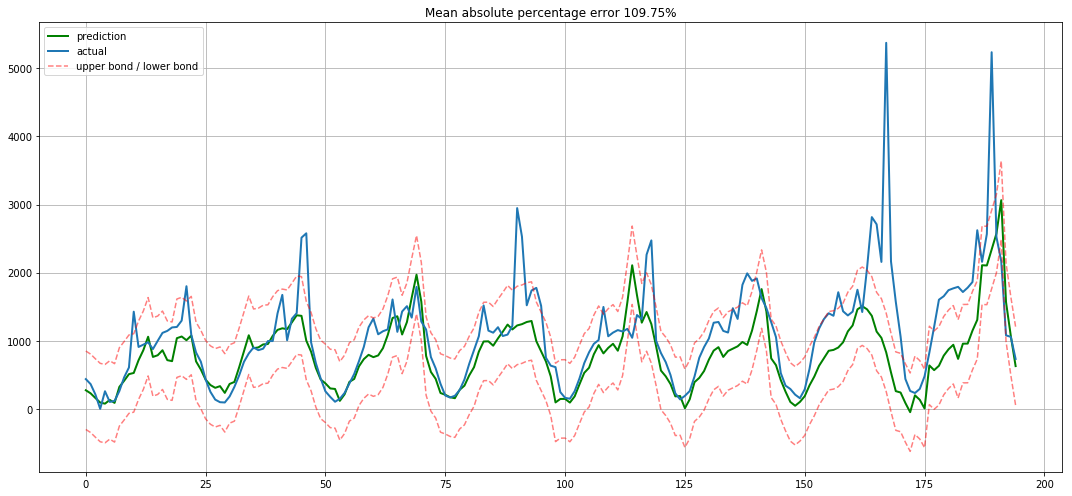

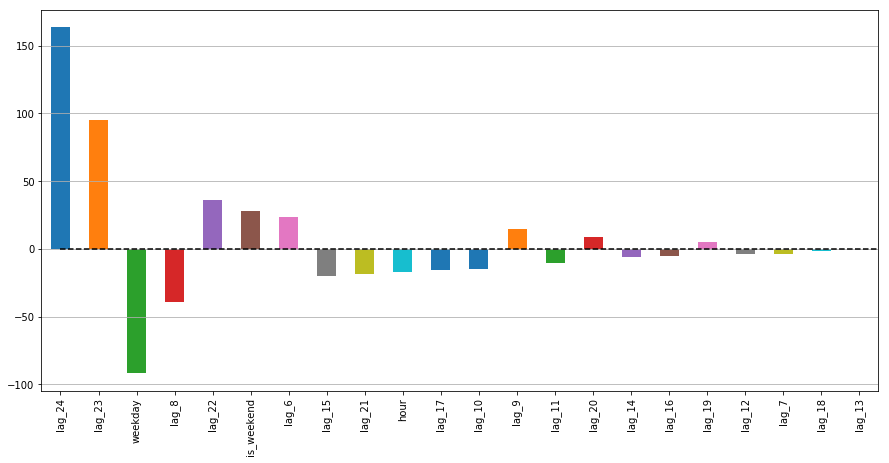

In [147]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

In [148]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

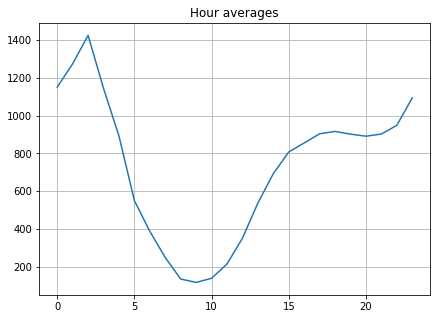

In [149]:
average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);


In [150]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = data.index.to_datetime()
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

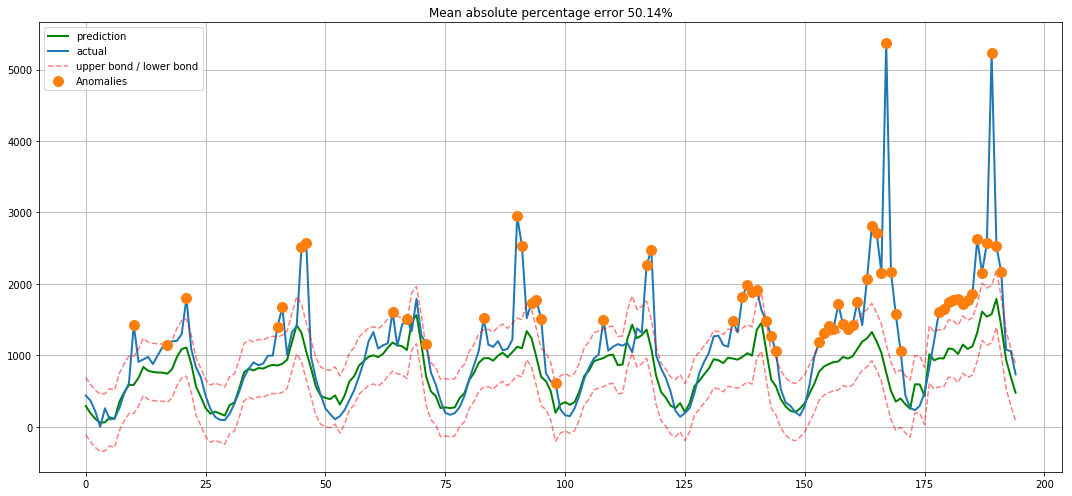

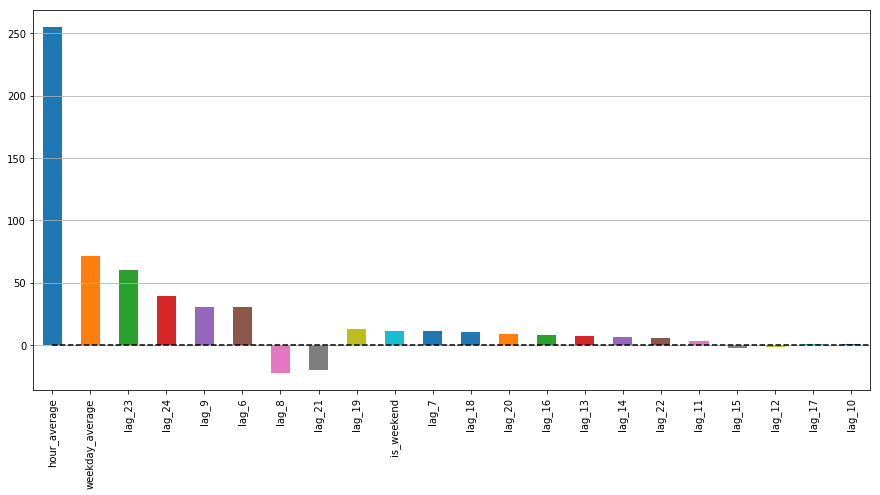

In [151]:
X_train, X_test, y_train, y_test = prepareData(web_direct['value'], lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

In [152]:
X_train, X_test, y_train, y_test =\
prepareData(web_direct['value'], lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

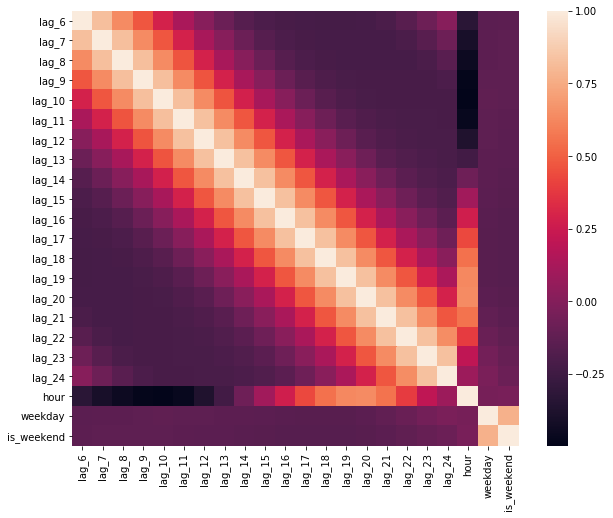

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

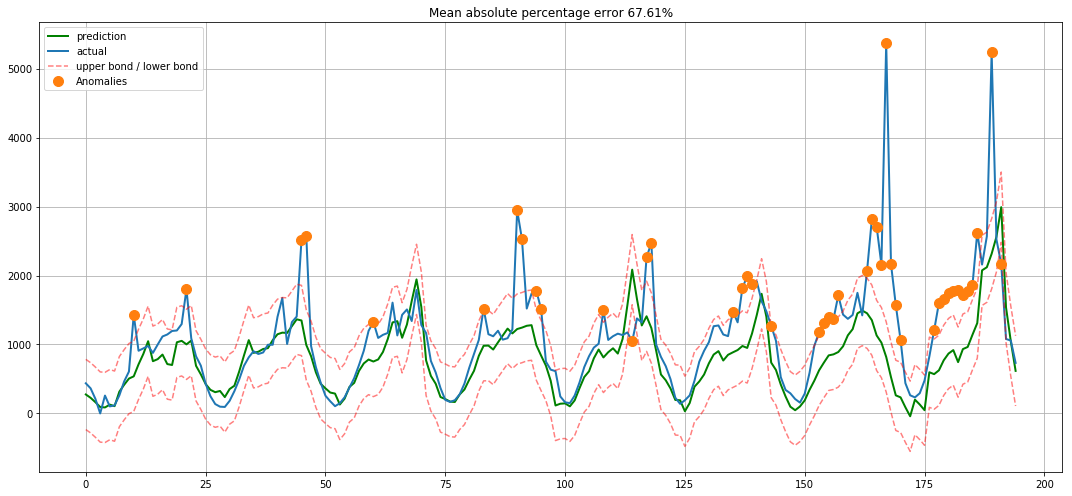

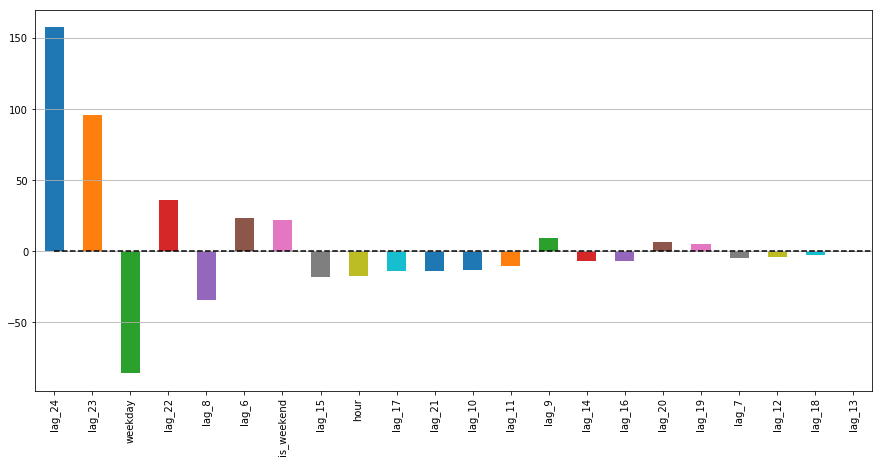

In [154]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

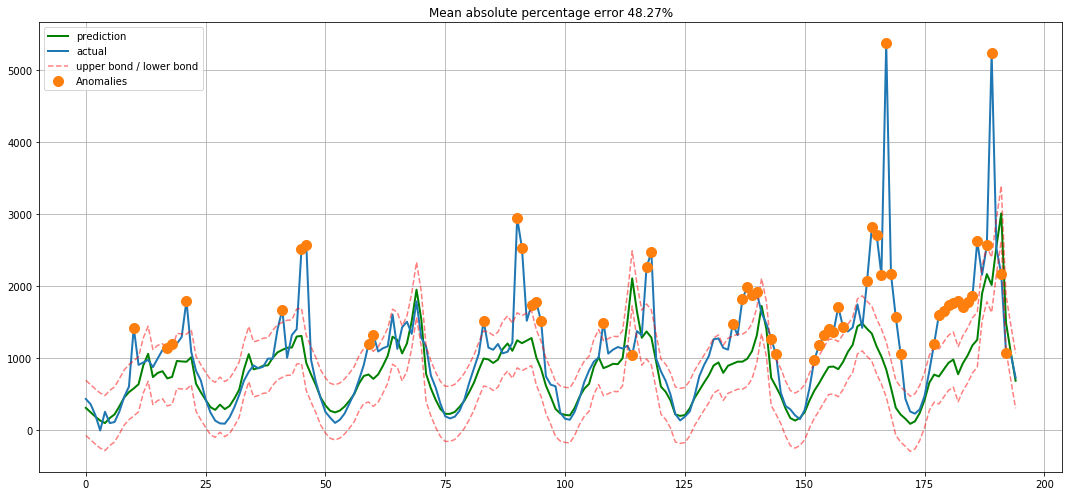

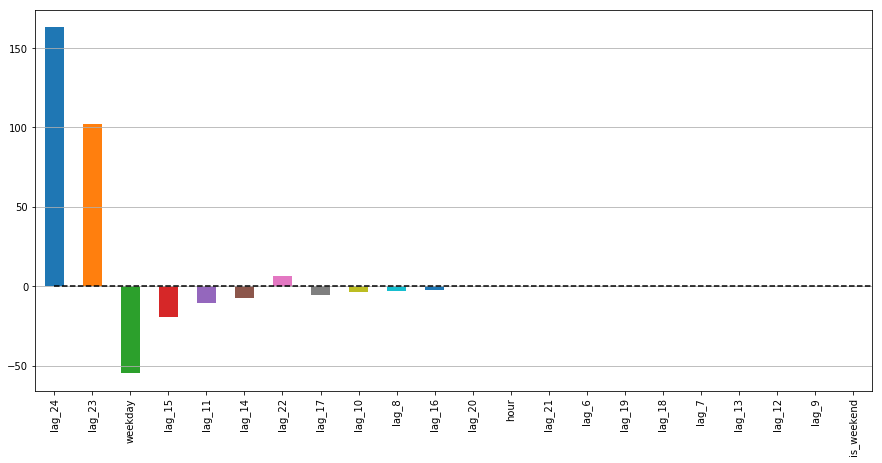

In [155]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

### DataScience.com

https://www.datascience.com/blog/python-anomaly-detection

In [205]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [254]:

# 3. Lets define some use-case specific UDF(User Defined Functions)

def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two one dimensional sequences.
    Args:
    -----
            data (pandas.Series): independent variable
            window_size (int): rolling window size

    Returns:
    --------
            ndarray of linear convolution

    References:
    ------------
    [1] Wikipedia, "Convolution", http://en.wikipedia.org/wiki/Convolution.
    [2] API Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html

    """
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using stationary standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies

    """
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in izip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
#     plt.xlim(0, 1000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float, count=len(events['anomalies_dict']))
    plt.plot(x[x_anomaly], y_anomaly, "r*", markersize=12)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

In [291]:
web_direct = df_web[df_web['traffic_source'] == 'direct']['2017-11-06':'2017-11-07'][['value']].resample('1T').sum()

In [292]:
# 4. Lets play with the functions
x = web_direct.index
Y = web_direct['value']

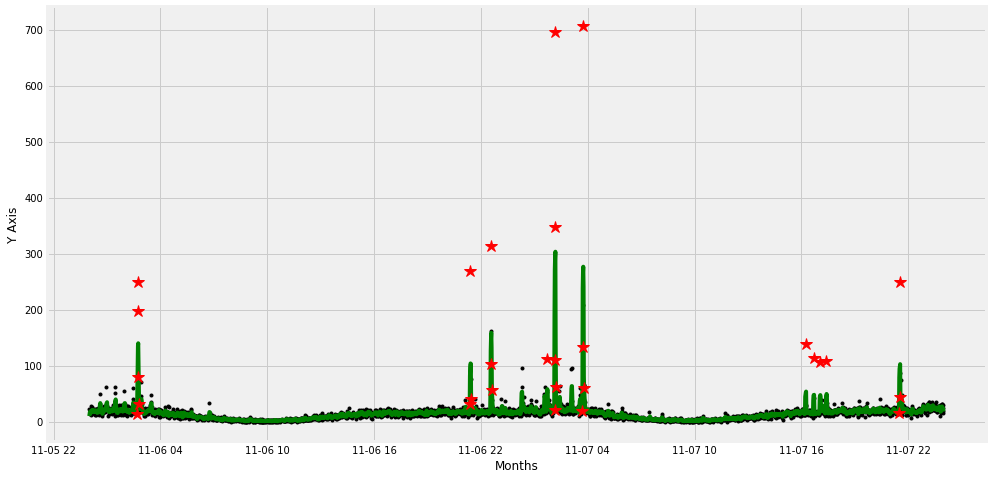

Information about the anomalies model:{'standard_deviation': 205.344, 'anomalies_dict': OrderedDict([(1, 1686.0), (90, 1801.0), (146, 2514.0), (147, 2578.0)])}


In [294]:
# plot the results
plot_results(x, y=Y, window_size=4, text_xlabel="Months", sigma_value=3)
events = explain_anomalies(y, window_size=5, sigma=3)

# Display the anomaly dict
print("Information about the anomalies model:{}".format(events))